In [68]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import odeint
#from scipy.integrate import ode
import matplotlib as mpl

%matplotlib inline

In [84]:
m = 1.
a = 0.24250109
b = -0.0607718825
c = 0.93240727
d = 0.86473146

def norm(r):
    return np.sqrt(r[0]**2 + r[1]**2)

def f(Y):
    r1 = np.array([Y[0],Y[1]])
    r2 = np.array([Y[2],Y[3]])
    r3 = np.array([Y[4],Y[5]])
    r12 = r2 - r1 
    r13 = r3 - r1
    r23 = r3 - r2
    norm_r12 = norm(r12) 
    norm_r13 = norm(r13)
    norm_r23 = norm(r23)
    return np.array([Y[6], Y[7], Y[8], Y[9], Y[10], Y[11],
                      m*r12[0]/(norm_r12**3) + m*r13[0]/(norm_r13**3),  m*r12[1]/(norm_r12**3) + m*r13[1]/(norm_r13**3),
                     -m*r12[0]/(norm_r12**3) + m*r23[0]/(norm_r23**3), -m*r12[1]/(norm_r12**3) + m*r23[1]/(norm_r23**3),
                     -m*r13[0]/(norm_r13**3) - m*r23[0]/(norm_r23**3), -m*r13[1]/(norm_r13**3) - m*r23[1]/(norm_r23**3)])

def one_Kutta4_step():
    global t
    global Deltat
    global Y
    K1 = f(Y)
    K2 = f(Y + Deltat*(1./2.*K1))
    K3 = f(Y + Deltat*(1./2.*K2))
    K4 = f(Y + Deltat*K3)
    Y+= Deltat * (1./6.*K1 + 1./3.*K2 + 1./3.*K3 + 1./6.*K4)
    t+= Deltat

In [87]:
chosenstep = one_Kutta4_step

numIter = 1000

r1_0 = np.array([a,b])
r2_0 = np.array([-a,-b])
r3_0 = np.array([0.,0.])
v1_0 = np.array([c,d])
v2_0 = np.array([c,d])
v3_0 = np.array([-2*c,-2*d])
Y = np.array([r1_0[0], r1_0[1], r2_0[0], r2_0[1], r3_0[0], r3_0[1], v1_0[0], v1_0[1], v2_0[0], v2_0[1], v3_0[0], v3_0[1]])

tmax = 0.5

t = 0.

Deltat = tmax/numIter

history = np.array([[t,Y[0],Y[1],Y[2],Y[3],Y[4],Y[5],Y[6],Y[7],Y[8],Y[9],Y[10],Y[11]]])

for i in range(numIter):
    chosenstep()
    history = np.append(history,[[t,Y[0],Y[1],Y[2],Y[3],Y[4],Y[5],Y[6],Y[7],Y[8],Y[9],Y[10],Y[11]]],axis=0)

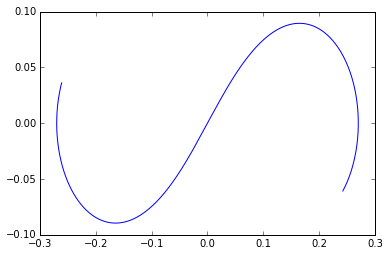

In [88]:
x1 = history[:,1]
y1 = history[:,2]
plt.plot(x1,y1)